# Hasil Penerapan ML

## Penerapan ML

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
import seaborn as sns

# Load Dataset untuk dianalisis
tone_data = pd.read_csv('data_regresi_mil4.csv')
data = tone_data[['Country','AvgTone_Norm', 'TaxRev', 'Export', 'Import', 'GDP growth', 'GDP Capita', 'Inflation', 'Unemployment',  'FDI', 'CAB']]

imputer = Imputer(missing_values='NaN', strategy='median', axis = 0)
data.iloc[:, 1:] = imputer.fit_transform(data.iloc[:, 1:])


/home/maziyank/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Correlation

/home/maziyank/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


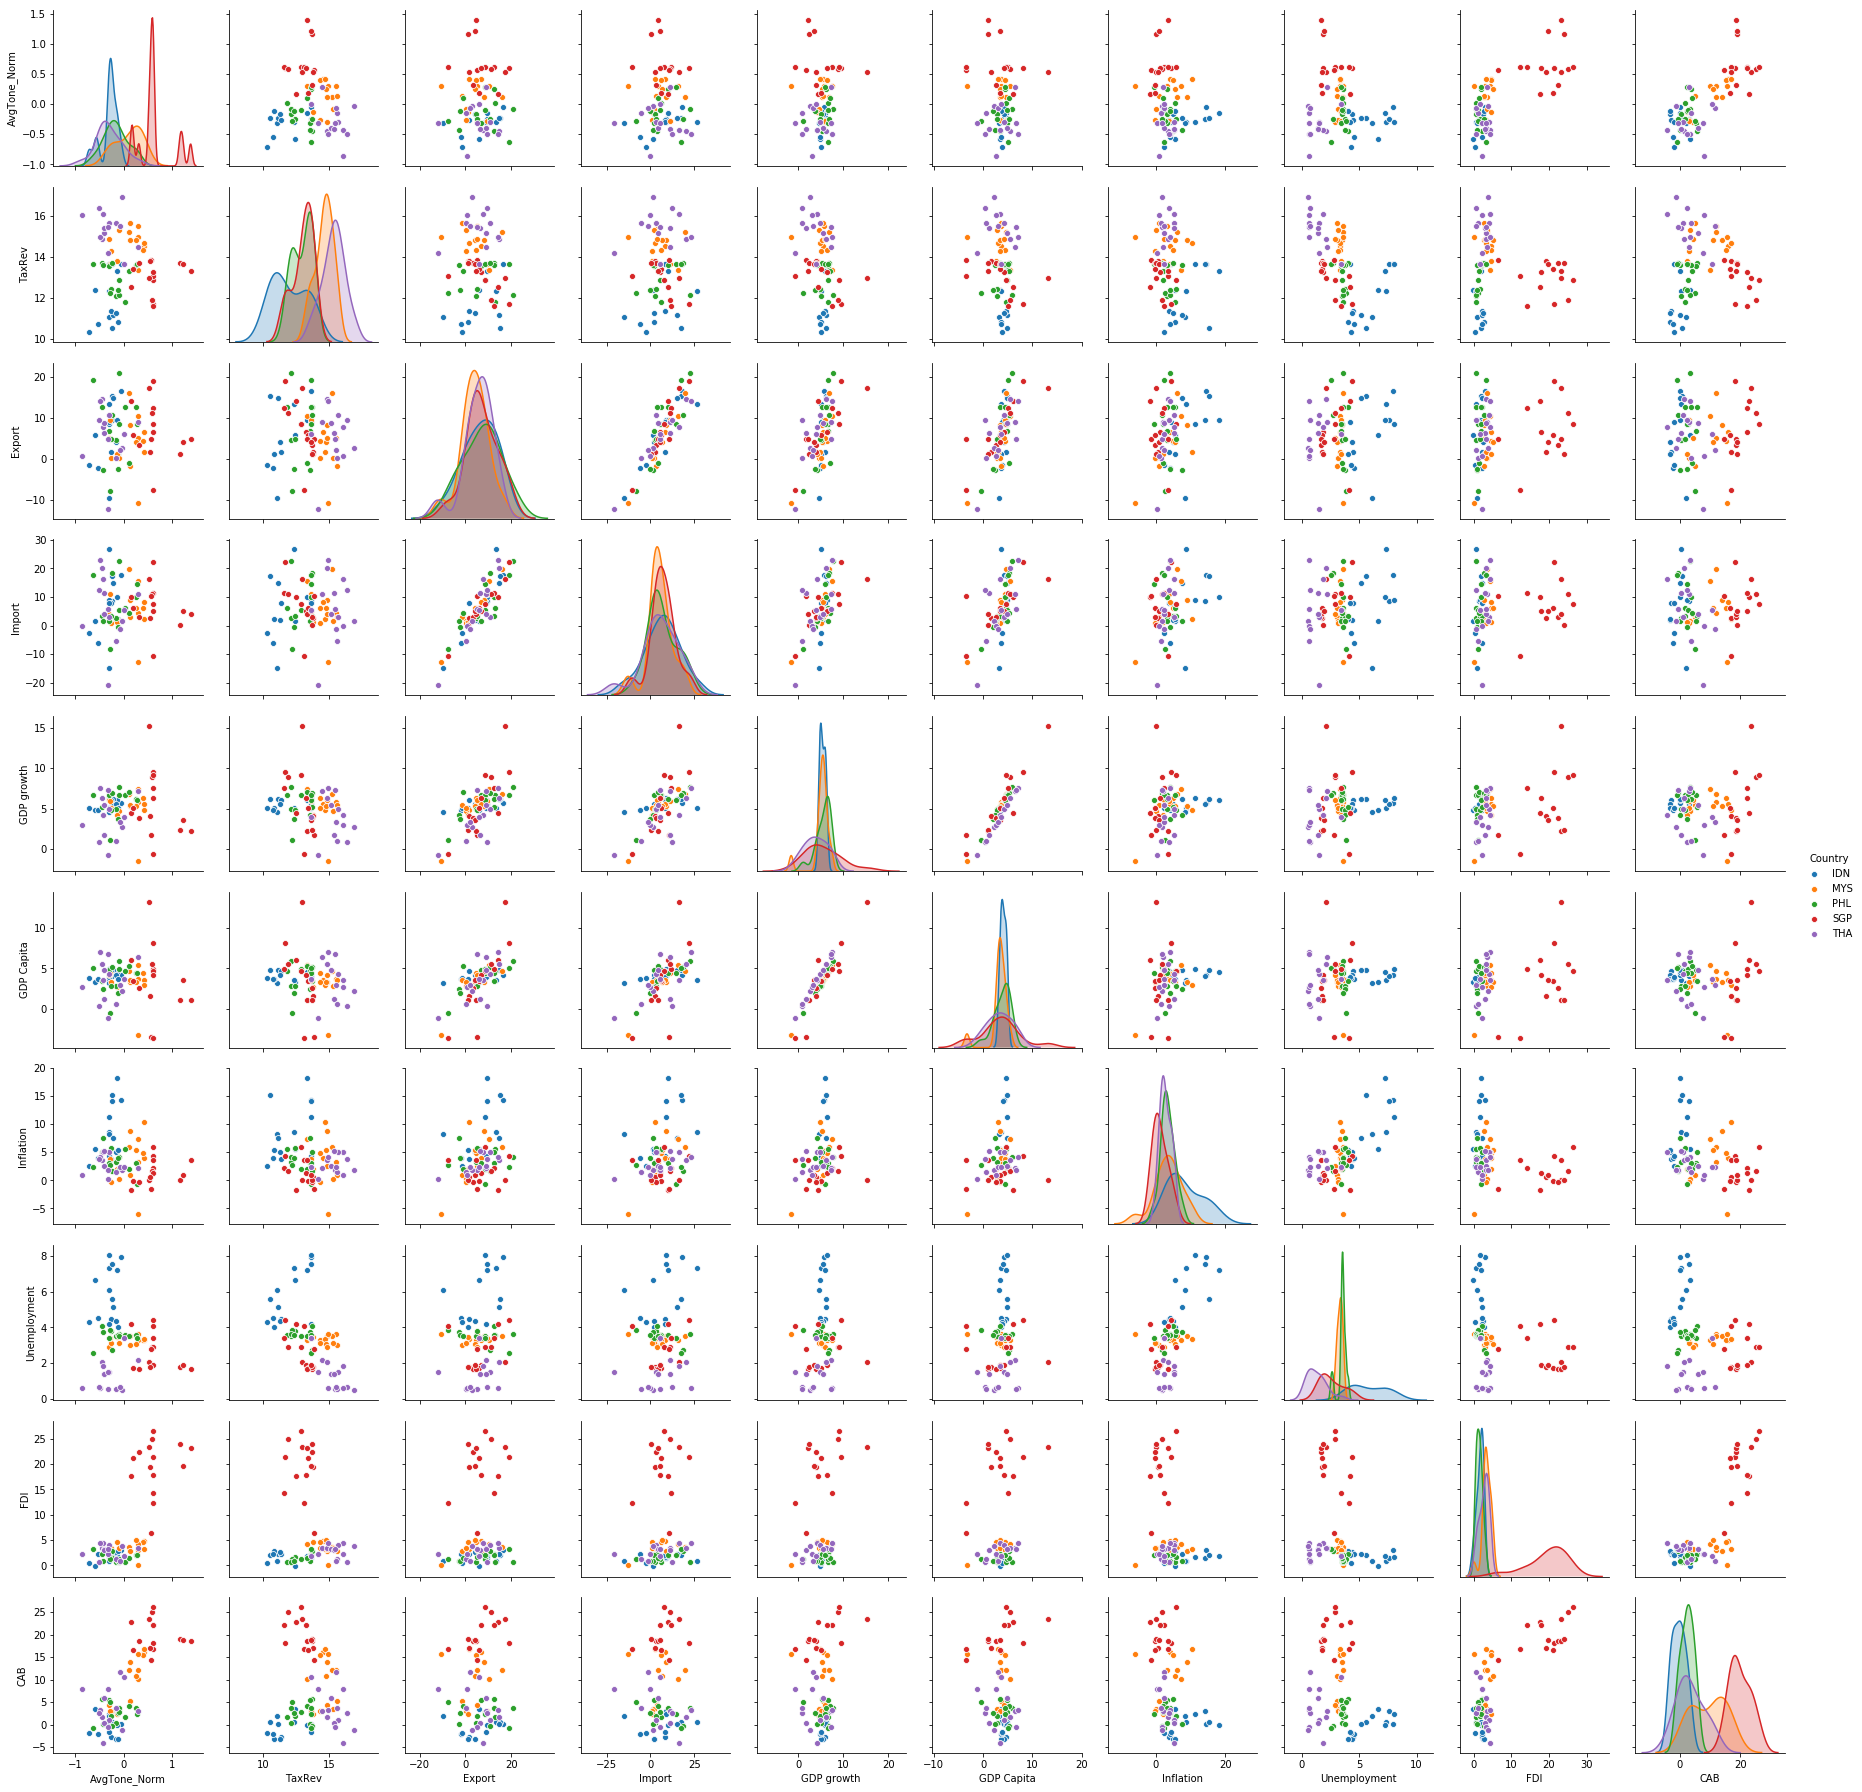

In [70]:
 g = sns.pairplot(data, hue="Country")

In [69]:
data.corr()

,AvgTone_Norm,TaxRev,Export,Import,GDP growth,GDP Capita,Inflation,Unemployment,FDI,CAB
AvgTone_Norm,1.000000,-0.039888,0.005124,0.020122,0.060202,-0.070115,-0.223941,-0.148819,0.727840,0.777628
TaxRev,-0.039888,1.000000,-0.064953,-0.007209,-0.271587,-0.190813,-0.216673,-0.554091,-0.124068,0.037963
Export,0.005124,-0.064953,1.000000,0.894134,0.655124,0.665407,0.296237,0.127535,0.136178,0.022429
Import,0.020122,-0.007209,0.894134,1.000000,0.600836,0.592117,0.285707,0.122280,0.088989,-0.042463
GDP growth,0.060202,-0.271587,0.655124,0.600836,1.000000,0.929699,0.202627,0.165688,0.217844,0.094212
GDP Capita,-0.070115,-0.190813,0.665407,0.592117,0.929699,1.000000,0.194583,0.098627,0.139658,-0.021787
Inflation,-0.223941,-0.216673,0.296237,0.285707,0.202627,0.194583,1.000000,0.645671,-0.286813,-0.320780
Unemployment,-0.148819,-0.554091,0.127535,0.122280,0.165688,0.098627,0.645671,1.000000,-0.264787,-0.238951
FDI,0.727840,-0.124068,0.136178,0.088989,0.217844,0.139658,-0.286813,-0.264787,1.000000,0.794065
CAB,0.777628,0.037963,0.022429,-0.042463,0.094212,-0.021787,-0.320780,-0.238951,0.794065,1.000000


In [44]:
data.describe()

,AvgTone_Norm,TaxRev,Export,Import,GDP growth,GDP Capita,Inflation,Unemployment,FDI,CAB
count,7.500000e+01,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,1.125026e-16,13.594389,6.107250,6.369031,5.142103,3.631287,3.932183,3.310085,5.818120,7.133705
std,4.454359e-01,1.497946,7.025269,8.774408,2.449009,2.429468,3.970409,1.731132,7.412019,8.100921
min,-8.607774e-01,10.332145,-12.140286,-20.772293,-1.513529,-3.556386,-5.992098,0.489200,-0.254256,-4.036462
25%,-3.011157e-01,12.477998,1.590916,1.792896,4.170296,2.843150,1.749455,1.985600,1.679759,0.862542
50%,-1.217914e-01,13.627604,6.105162,5.609609,5.293913,3.731245,3.521019,3.400000,2.916115,3.596940
75%,2.918554e-01,14.810372,10.550038,11.120633,6.321904,4.811844,5.273092,3.953350,4.441033,14.199214
max,1.387529e+00,16.909111,20.970702,26.653294,15.240377,13.216493,18.149751,8.060200,26.521207,26.058608


## AvgTone vs Current Account Balance (CAB)

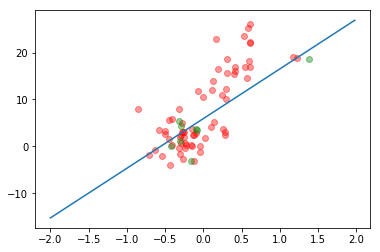

{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_intercept': True, 'intercept_scaling': 1.0, 'loss': 'epsilon_insensitive', 'max_iter': 1000, 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [68]:
#Membuat Model ML: 

#For Instance, AvgTone_Norm Vs Inflation
X = data['AvgTone_Norm'].values.reshape(-1, 1)
y = data['CAB'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

model = svm.LinearSVR()
model.fit(X_train, y_train) 

XX = np.arange(-2, 2, 0.02).reshape(-1, 1)
YY = model.predict(XX)

#Membuat Plot Garis
plt.plot(XX, YY)

#Membuat Scatter Graph Train Data (Warna Merah)
plt.scatter(X_train, y_train, color = 'red', alpha=0.4)

#Membuat Scatter Graph Test Data (Warna Hijau)
plt.scatter(X_test, y_test, color = 'green', alpha=0.4)

#Menampilkan Plot
plt.show()

# Model Evaluation
print(model.get_params())

# sns.pairplot(data, y_vars='AvgTone_Norm', x_vars='CAB', height=7, aspect=0.8, kind='reg')



## AvgTone vs Foreign Direct Investment (FDI)

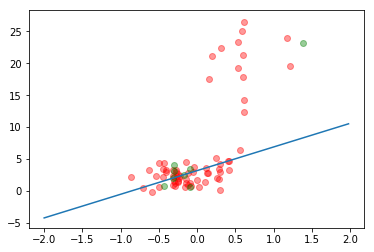

In [72]:
#Membuat Model ML: 

X = data['AvgTone_Norm'].values.reshape(-1, 1)
y = data['FDI'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

model = svm.LinearSVR()
model.fit(X_train, y_train) 

XX = np.arange(-2, 2, 0.02).reshape(-1, 1)
YY = model.predict(XX)

#Membuat Plot Garis
plt.plot(XX, YY)

#Membuat Scatter Graph Train Data (Warna Merah)
plt.scatter(X_train, y_train, color = 'red', alpha=0.4)

#Membuat Scatter Graph Test Data (Warna Hijau)
plt.scatter(X_test, y_test, color = 'green', alpha=0.4)

#Menampilkan Plot
plt.show()


## AvgTone vs Inflation

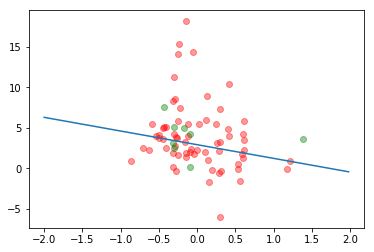

In [34]:
#Membuat Model ML: 

X = data['AvgTone_Norm'].values.reshape(-1, 1)
y = data['Inflation'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

model = svm.LinearSVR()
model.fit(X_train, y_train) 

XX = np.arange(-2, 2, 0.02).reshape(-1, 1)
YY = model.predict(XX)

#Membuat Plot Garis
plt.plot(XX, YY)

#Membuat Scatter Graph Train Data (Warna Merah)
plt.scatter(X_train, y_train, color = 'red', alpha=0.4)

#Membuat Scatter Graph Test Data (Warna Hijau)
plt.scatter(X_test, y_test, color = 'green', alpha=0.4)

#Menampilkan Plot
plt.show()


# Extremely News Keyword Extraction (Bonus)

In [73]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd

host = '127.0.0.1'
port = "3306"
user = 'root'
password = 'ugm2018'
database = 'gdelt2'


conn_str = 'mysql+pymysql://{}:{}@{}:{}/{}'.format(user, password, host, port, database);           
engine = create_engine(conn_str)

def run(sql):
    df = pd.read_sql_query(sql,engine)
    return df

def execute(sql):
    return engine.execute(statement=sql)


## 1. Extremely Positive News

In [96]:
Pos_keywords = [None] * 5

Pos_keywords[0] = run("""
SELECT SOURCEURL, keywords from events_ID where keywords <> '' and AvgTone > 0
""")

Pos_keywords[1] = run("""
SELECT SOURCEURL, keywords from events_MY where keywords <> '' and AvgTone > 0
""")

Pos_keywords[2] = run("""
SELECT SOURCEURL, keywords from events_SN where keywords <> '' and AvgTone > 0
""")

Pos_keywords[3] = run("""
SELECT SOURCEURL, keywords from events_TH where keywords <> '' and AvgTone > 0
""")

Pos_keywords[4] = run("""
SELECT SOURCEURL, keywords from events_RP where keywords <> '' and AvgTone > 0
""")

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import os
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

docs = [None] * 5
X1 = [None] * 5
images = [None] * 5

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Indonesia, Indonesian"])

for i in range(5):
    cv = CountVectorizer()
    docs[i] = Pos_keywords[i]['keywords'].values.tolist()
    cv.fit_transform(docs[i])
    
    text = ' '.join(list(cv.get_feature_names()))
    wordcloud = WordCloud(max_words = 50, stopwords=stopwords, background_color="white").generate(text)
    images[i] = wordcloud.to_image()    

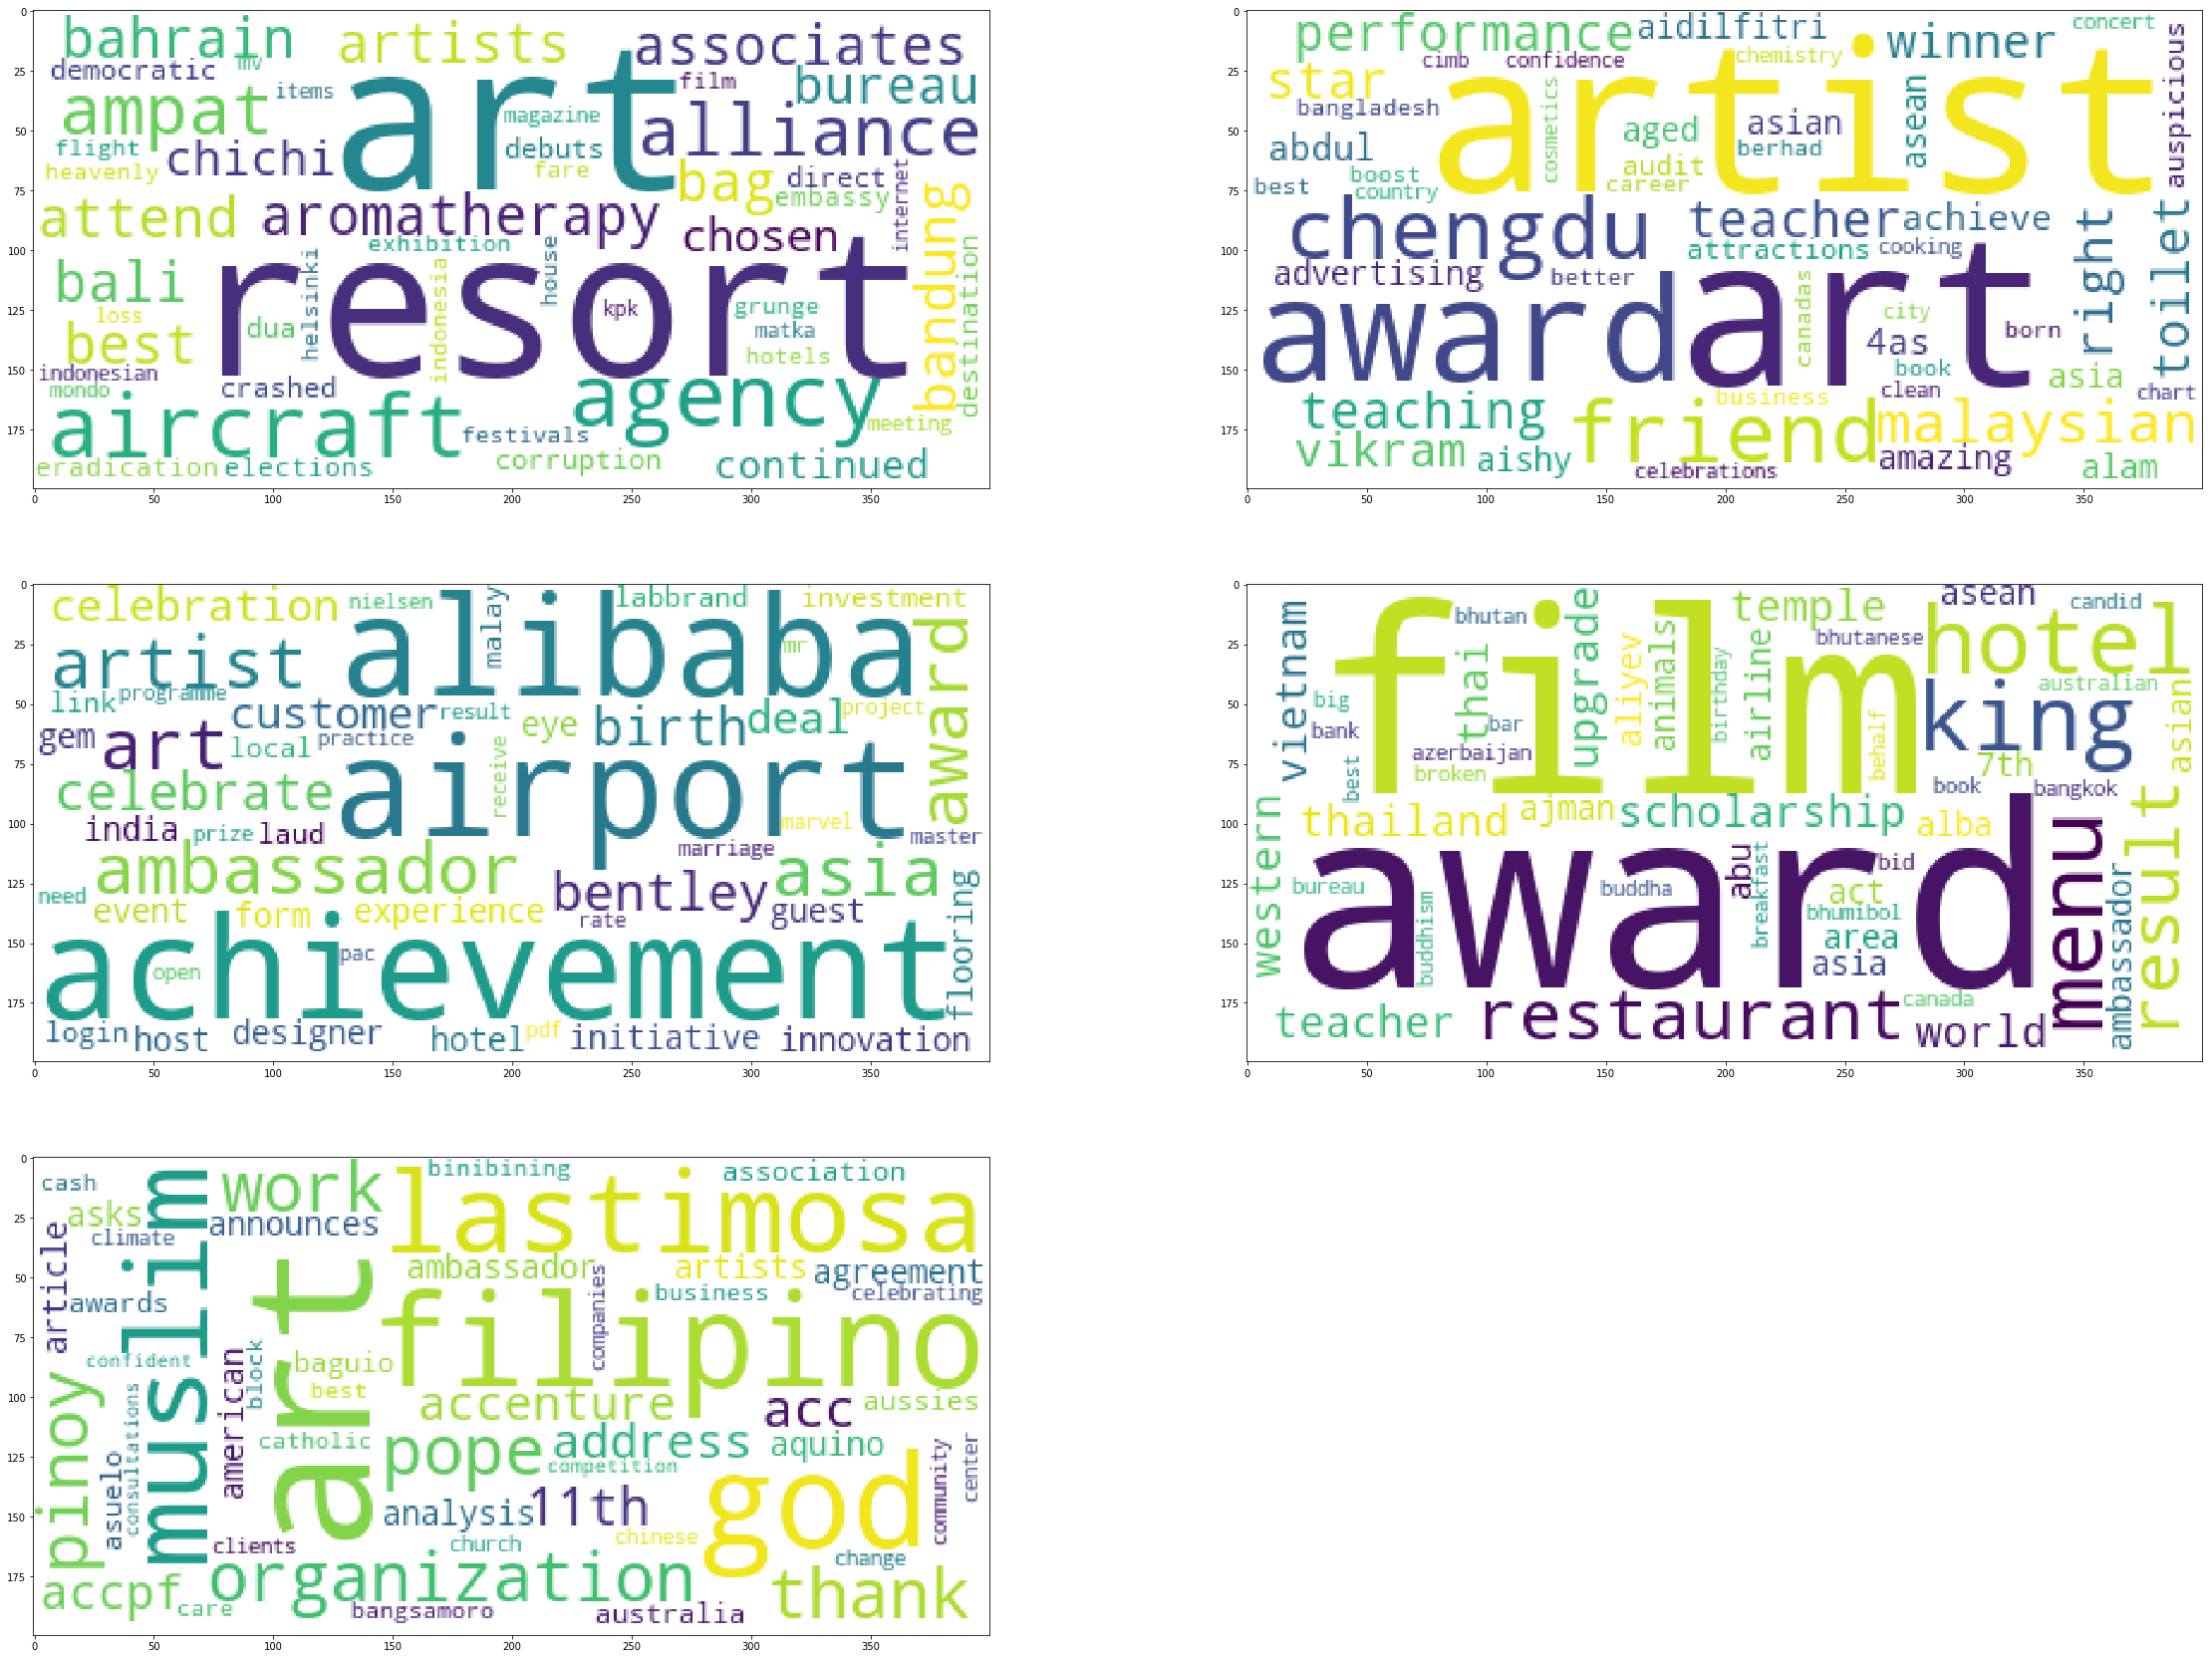

In [112]:
plt.figure(figsize=(40,30))
columns = 2
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

## 2. Extremely Negative News

In [113]:
Pos_keywords = [None] * 5

Pos_keywords[0] = run("""
SELECT SOURCEURL, keywords from events_ID where keywords <> '' and AvgTone < 0
""")

Pos_keywords[1] = run("""
SELECT SOURCEURL, keywords from events_MY where keywords <> '' and AvgTone < 0
""")

Pos_keywords[2] = run("""
SELECT SOURCEURL, keywords from events_SN where keywords <> '' and AvgTone < 0
""")

Pos_keywords[3] = run("""
SELECT SOURCEURL, keywords from events_TH where keywords <> '' and AvgTone < 0
""")

Pos_keywords[4] = run("""
SELECT SOURCEURL, keywords from events_RP where keywords <> '' and AvgTone < 0
""")

In [114]:
docs = [None] * 5
X1 = [None] * 5
images = [None] * 5

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Indonesia, Indonesian"])

for i in range(5):
    cv = CountVectorizer()
    docs[i] = Pos_keywords[i]['keywords'].values.tolist()
    cv.fit_transform(docs[i])
    
    text = ' '.join(list(cv.get_feature_names()))
    wordcloud = WordCloud(max_words = 50, stopwords=stopwords, background_color="white").generate(text)
    images[i] = wordcloud.to_image()    

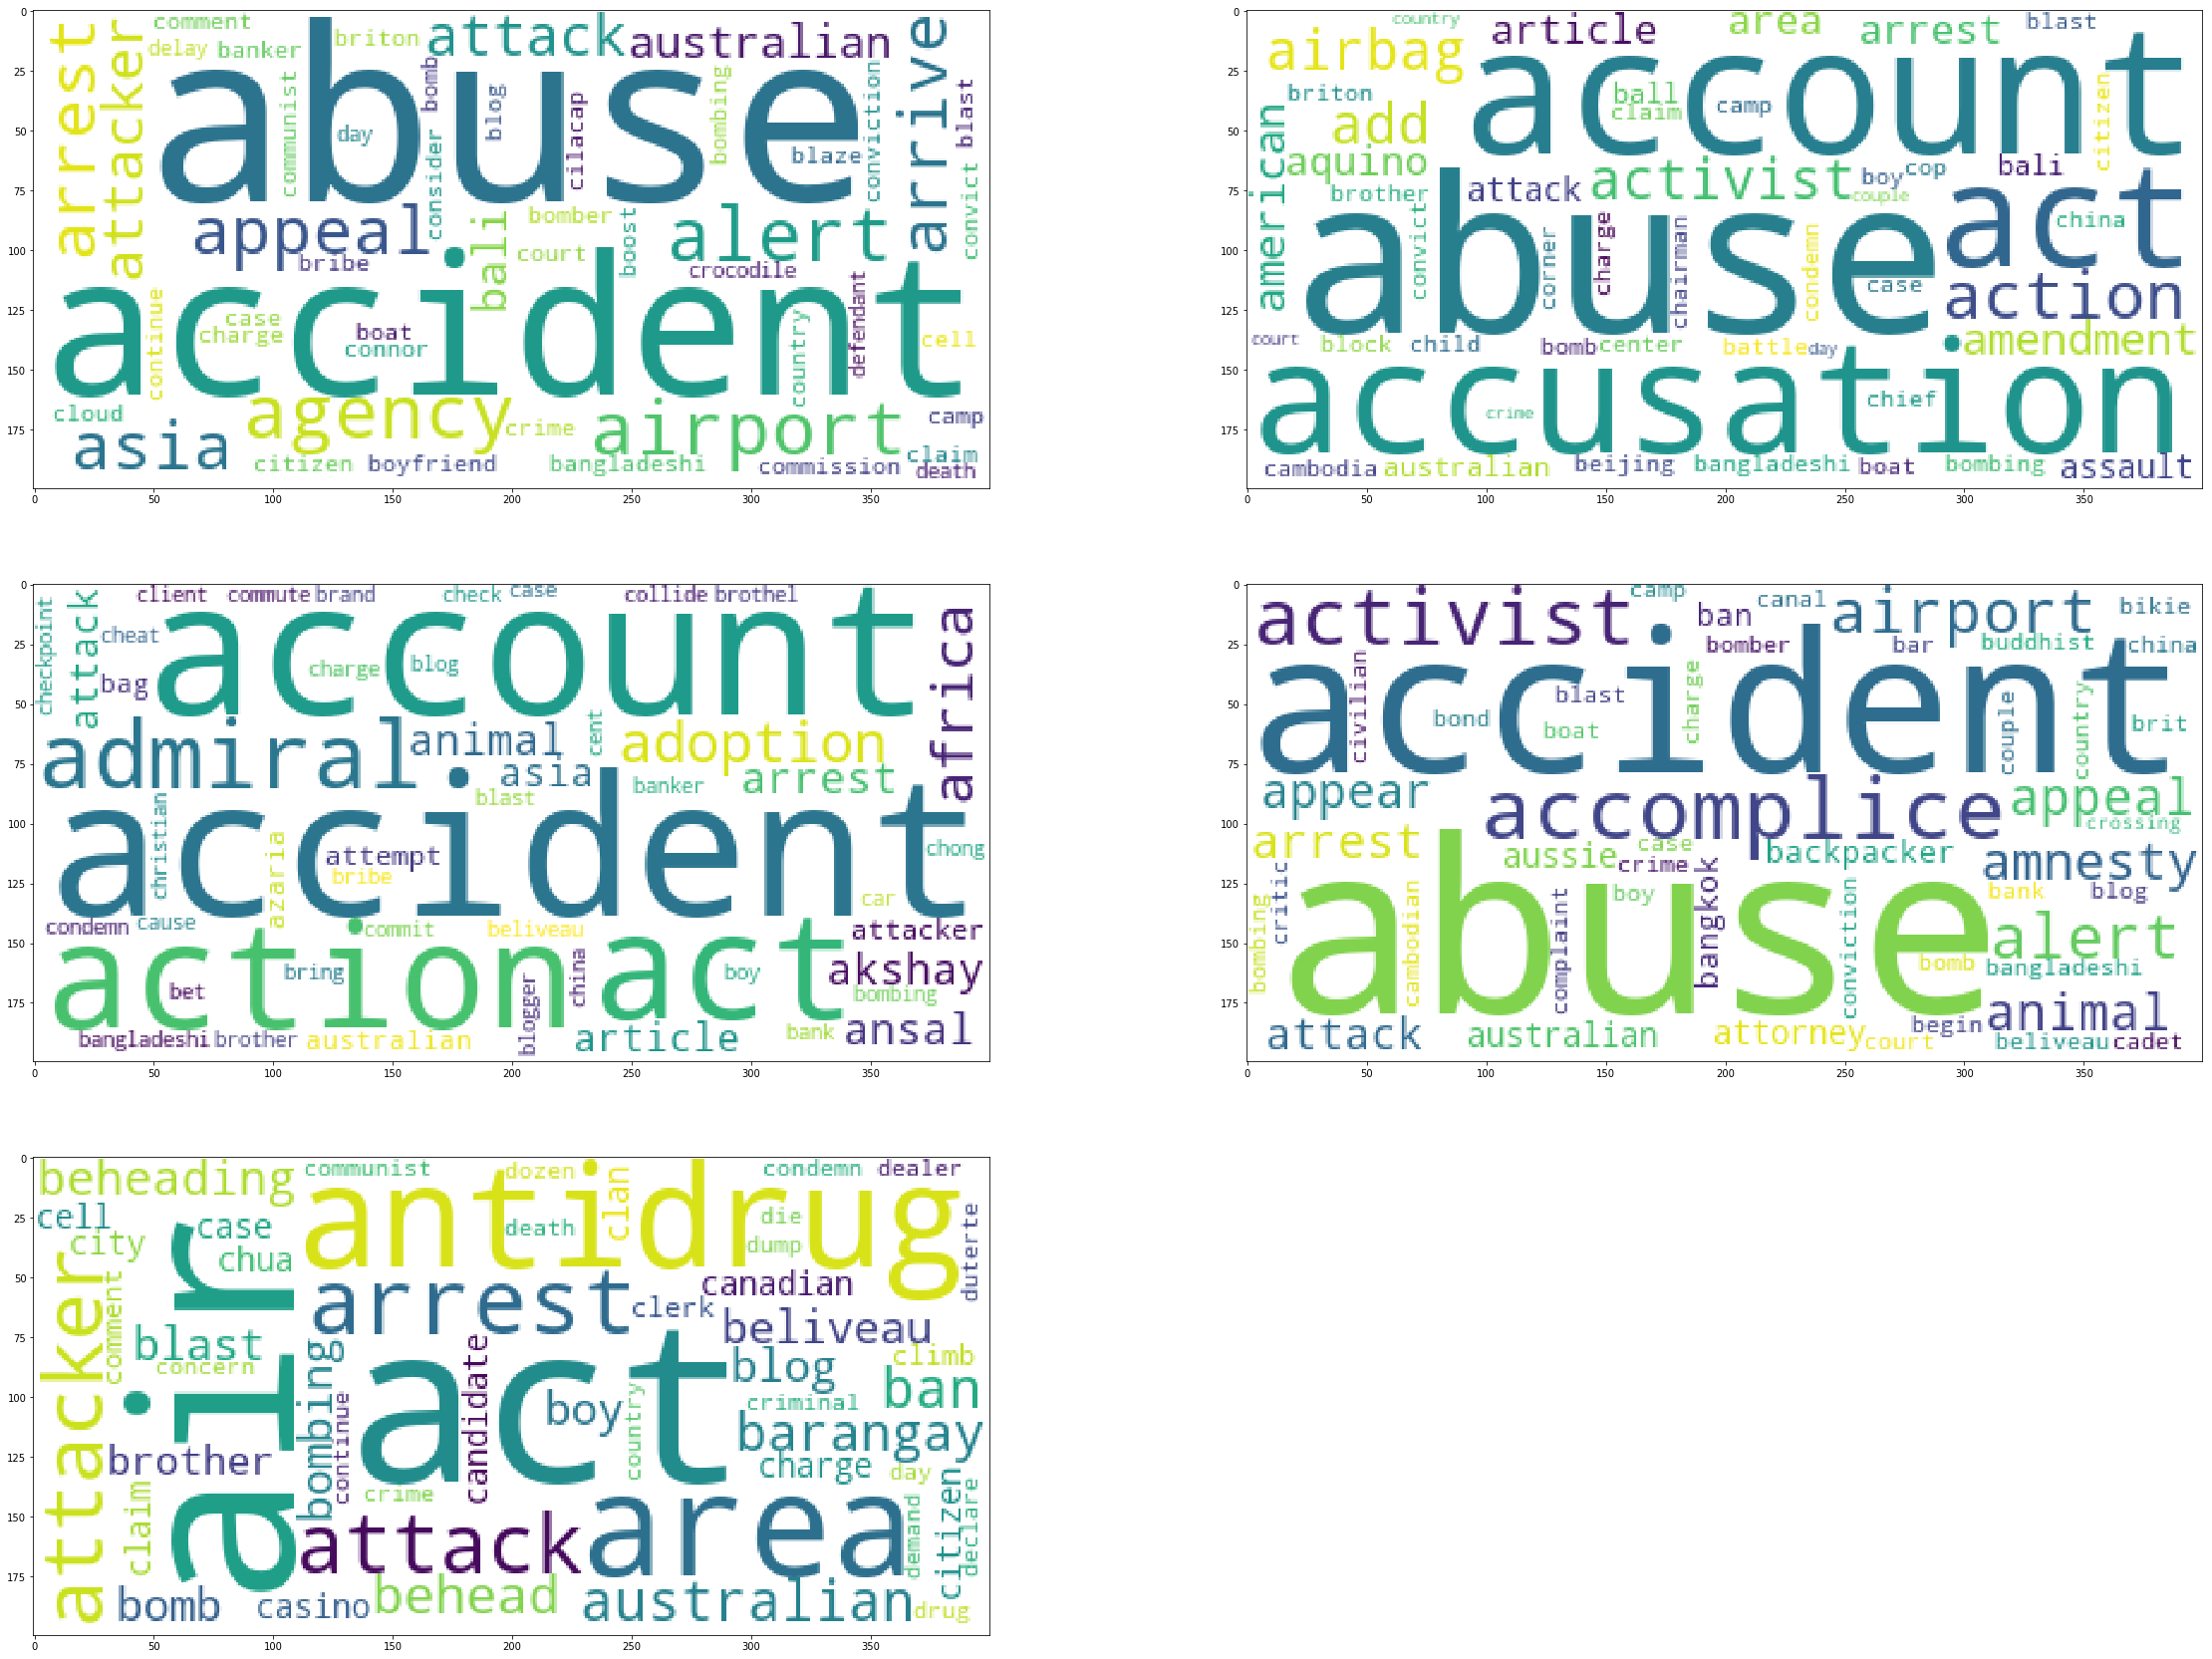

In [115]:
plt.figure(figsize=(40,30))
columns = 2
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)